In [1]:
import os, sys
root_dir = os.path.dirname(os.getcwd())
sys.path.append(root_dir)

import pandas as pd
import matplotlib.pyplot as plt
from configs import support_llms, support_llm_properties
import numpy as np
import matplotlib as mpl

df  = pd.read_pickle(f"{root_dir}/results/results.pkl")

df.head()

,_runtime,_step,_timestamp,_wandb,accuracy,calibrated_accuracy,consistency_rate,train_acc,seed,wandb,...,dataset_name,peft_variant,max_new_tokens,not_load_model,theory_example,theory_version,train_ml_model,system_prompt_name,run_name,run_id
0,608.820065,1999.0,1.733363e+09,{'runtime': 608},0.49750,0.0275,0.0600,NaN,42,True,...,relca,pretrained,1000,False,False,v4,,evaluator,fancy-rain-1,rws7x1ty
1,752.265414,1999.0,1.733364e+09,{'runtime': 752},0.51425,0.0760,0.1235,NaN,42,True,...,relca,pretrained,1000,False,False,v4,,evaluator,misty-frost-2,9n1ogm1l
2,5171.656271,1999.0,1.733368e+09,{'runtime': 5171},0.49675,0.0385,0.0405,NaN,42,True,...,relca,pretrained,1000,False,False,v4,,evaluator,denim-jazz-3,3qi1ixru
3,273.379546,1999.0,1.733363e+09,{'runtime': 273},0.60700,0.4520,0.6900,NaN,42,True,...,relca,pretrained,1000,False,False,v4,,evaluator,likely-yogurt-5,spxsot9y
4,1997.155615,1999.0,1.733365e+09,{'runtime': 1997},0.51175,0.0305,0.0375,NaN,42,True,...,relca,pretrained,1000,False,False,v4,,evaluator,exalted-resonance-6,8ixjdl3c


In [2]:
def get_row(**kwargs):
    condition = None
    for key, value in kwargs.items():

        if condition is None:
            condition = df[key] == value
        else:
            condition &= df[key] == value
    return df[condition].reset_index(drop=True)

In [3]:
mllms = [
    "gpt-4o-mini",
    "gpt-4o",
    "Llama-3.2-11B-Vision-Instruct",
    "Llama-3.2-90B-Vision-Instruct",
    'Qwen2-VL-2B-Instruct',
    'Qwen2-VL-7B-Instruct',
    'Qwen2-VL-72B-Instruct',
    'gemini-1.5-flash',
    'gemini-1.5-pro',
    'pixtral-12b',
    'gemini-2.0-flash',
    'o1-2024-12-17',
    # 'o3-mini-2025-01-31',
    # 'o3-preview-2024-11-20',
]

llms = [
    'Qwen2.5-14B-Instruct',
    'Qwen2.5-72B-Instruct',
    "Llama-3.1-8B-Instruct",
    "Llama-3.1-70B-Instruct",
    "Mistral-7B-Instruct-v0.3",
    "Mixtral-8x22B-Instruct-v0.1",
    "Mistral-Large-Instruct-2407",
    "DeepSeek-R1-Distill-Qwen-32B",
    "DeepSeek-R1-Distill-Llama-70B",
]

independent_results = {
    "ICL": [
        {
            "model_name": "gemini-1.5-pro",
            "description": "",
            "prompt_name": "single",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 2,
            "label": "Gemini-1.5-Pro (2-shot)",
        },
        {
            "model_name": "gemini-1.5-pro",
            "description": "",
            "prompt_name": "single",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 4,
            "label": "Gemini-1.5-Pro (4-shot)",
        },
        {
            "model_name": "gemini-1.5-pro",
            "description": "",
            "prompt_name": "single",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 6,
            "label": "Gemini-1.5-Pro (6-shot)",
        },
        {
            "model_name": "gemini-1.5-pro",
            "description": "",
            "prompt_name": "single",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 8,
            "label": "Gemini-1.5-Pro (8-shot)",
        },
        {
            "model_name": "gpt-4o",
            "description": "",
            "prompt_name": "single",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 2,
            "label": "GPT-4o (2-shot)",
        },
        {
            "model_name": "gpt-4o",
            "description": "",
            "prompt_name": "single",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 4,
            "label": "GPT-4o (4-shot)",
        },
        {
            "model_name": "gpt-4o",
            "description": "",
            "prompt_name": "single",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 6,
            "label": "GPT-4o (6-shot)",
        },
        {
            "model_name": "gpt-4o",
            "description": "",
            "prompt_name": "single",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 8,
            "label": "GPT-4o (8-shot)",
        },
        {
            "model_name": "Qwen2-VL-72B-Instruct",
            "description": "",
            "prompt_name": "single",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 2,
            "label": "Qwen2-VL-72B (2-shot)",
        },
        {
            "model_name": "Qwen2-VL-72B-Instruct",
            "description": "",
            "prompt_name": "single",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 4,
            "label": "Qwen2-VL-72B (4-shot)",
        },
        {
            "model_name": "Qwen2-VL-72B-Instruct",
            "description": "",
            "prompt_name": "single",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 6,
            "label": "Qwen2-VL-72B (6-shot)",
        },
        {
            "model_name": "Qwen2-VL-72B-Instruct",
            "description": "",
            "prompt_name": "single",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 8,
            "label": "Qwen2-VL-72B (8-shot)",
        },
        {
            "model_name": "Qwen2.5-72B-Instruct",
            "description": "gemini-1.5-pro",
            "prompt_name": "single",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 2,
            "label": "Qwen2.5-72B (2-shot)",
        },
        {
            "model_name": "Qwen2.5-72B-Instruct",
            "description": "gemini-1.5-pro",
            "prompt_name": "single",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 4,
            "label": "Qwen2.5-72B (4-shot)",
        },
        {
            "model_name": "Qwen2.5-72B-Instruct",
            "description": "gemini-1.5-pro",
            "prompt_name": "single",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 6,
            "label": "Qwen2.5-72B (6-shot)",
        },
        {
            "model_name": "Qwen2.5-72B-Instruct",
            "description": "gemini-1.5-pro",
            "prompt_name": "single",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 8,
            "label": "Qwen2.5-72B (8-shot)",
        },
        {
            "model_name": "Llama-3.1-70B-Instruct",
            "description": "gemini-1.5-pro",
            "prompt_name": "single",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 2,
            "label": "Llama-3.1-70B (2-shot)",
        },
        {
            "model_name": "Llama-3.1-70B-Instruct",
            "description": "gemini-1.5-pro",
            "prompt_name": "single",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 4,
            "label": "Llama-3.1-70B (4-shot)",
        },
        {
            "model_name": "Llama-3.1-70B-Instruct",
            "description": "gemini-1.5-pro",
            "prompt_name": "single",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 6,
            "label": "Llama-3.1-70B (6-shot)",
        },
        {
            "model_name": "Llama-3.1-70B-Instruct",
            "description": "gemini-1.5-pro",
            "prompt_name": "single",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 8,
            "label": "Llama-3.1-70B (8-shot)",
        },
    ],
    "Reasoning": [
        {
            "model_name": "o1-2024-12-17",
            "description": "",
            "prompt_name": "single",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 2,
            "label": "o1 (2-shot)",
        },
        {
            "model_name": "DeepSeek-R1-Distill-Qwen-32B",
            "description": "gemini-1.5-pro",
            "prompt_name": "single",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 2,
            "label": "DeepSeek-R1-Distill-Qwen-32B (2-shot)",
        },
        {
            "model_name": "DeepSeek-R1-Distill-Llama-70B",
            "description": "gemini-1.5-pro",
            "prompt_name": "single",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 2,
            "label": "DeepSeek-R1-Distill-Llama-70B (2-shot)",
        }, 
    ],
}

pairwise_results = {

    "ICL": [
        {
            "model_name": "gemini-1.5-pro",
            "description": "",
            "prompt_name": "standard",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 0,
            "label": "Gemini-1.5-Pro (0-shot)",
        },
        {
            "model_name": "gemini-1.5-pro",
            "description": "",
            "prompt_name": "standard",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 2,
            "label": "Gemini-1.5-Pro (2-shot)",
        },
        {
            "model_name": "gemini-1.5-pro",
            "description": "",
            "prompt_name": "standard",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 4,
            "label": "Gemini-1.5-Pro (4-shot)",
        },
        {
            "model_name": "gpt-4o",
            "description": "",
            "prompt_name": "standard",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 0,
            "label": "GPT-4o (0-shot)",
        },
        {
            "model_name": "gpt-4o",
            "description": "",
            "prompt_name": "standard",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 2,
            "label": "GPT-4o (2-shot)",
        },
        {
            "model_name": "gpt-4o",
            "description": "",
            "prompt_name": "standard",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 4,
            "label": "GPT-4o (4-shot)",
        },
        {
            "model_name": "Qwen2-VL-72B-Instruct",
            "description": "",
            "prompt_name": "standard",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 0,
            "label": "Qwen2-VL-72B (0-shot)",
        },
        {
            "model_name": "Qwen2-VL-72B-Instruct",
            "description": "",
            "prompt_name": "standard",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 2,
            "label": "Qwen2-VL-72B (2-shot)",
        },
        {
            "model_name": "Qwen2-VL-72B-Instruct",
            "description": "",
            "prompt_name": "standard",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 4,
            "label": "Qwen2-VL-72B (4-shot)",
        },
        {
            "model_name": "Qwen2.5-72B-Instruct",
            "description": "gemini-1.5-pro",
            "prompt_name": "standard",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 0,
            "label": "Qwen2.5-72B (0-shot)",
        },
        {
            "model_name": "Qwen2.5-72B-Instruct",
            "description": "gemini-1.5-pro",
            "prompt_name": "standard",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 2,
            "label": "Qwen2.5-72B (2-shot)",
        },
        {
            "model_name": "Qwen2.5-72B-Instruct",
            "description": "gemini-1.5-pro",
            "prompt_name": "standard",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 4,
            "label": "Qwen2.5-72B (4-shot)",
        },
        {
            "model_name": "Llama-3.1-70B-Instruct",
            "description": "gemini-1.5-pro",
            "prompt_name": "standard",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 0,
            "label": "Llama-3.1-70B (0-shot)",
        },
        {
            "model_name": "Llama-3.1-70B-Instruct",
            "description": "gemini-1.5-pro",
            "prompt_name": "standard",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 2,
            "label": "Llama-3.1-70B (2-shot)",
        },
        {
            "model_name": "Llama-3.1-70B-Instruct",
            "description": "gemini-1.5-pro",
            "prompt_name": "standard",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 4,
            "label": "Llama-3.1-70B (4-shot)",
        },
    ],
    "Reasoning": [
        {
            "model_name": "o1-2024-12-17",
            "description": "",
            "prompt_name": "standard",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 0,
            "label": "o1 (0-shot)",
        },
        {
            "model_name": "DeepSeek-R1-Distill-Qwen-32B",
            "description": "gemini-1.5-pro",
            "prompt_name": "standard",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 0,
            "label": "DeepSeek-R1-Distill-Qwen-32B (0-shot)",
        },
        {
            "model_name": "DeepSeek-R1-Distill-Llama-70B",
            "description": "gemini-1.5-pro",
            "prompt_name": "standard",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 0,
            "label": "DeepSeek-R1-Distill-Llama-70B (0-shot)",
        },
        {
            "model_name": "Qwen2-VL-72B-Instruct",
            "description": "",
            "prompt_name": "cot",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 0,
            "label": "Qwen2-VL-72B (CoT)",
        },
        {
            "model_name": "Qwen2.5-72B-Instruct",
            "description": "gemini-1.5-pro",
            "prompt_name": "cot",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 0,
            "label": "Qwen2.5-72B (CoT)",
        },
        {
            "model_name": "Llama-3.1-70B-Instruct",
            "description": "gemini-1.5-pro",
            "prompt_name": "cot",
            "eval_mode": "pairwise",
            "peft_variant": "pretrained",
            "n_demos": 0,
            "label": "Llama-3.1-70B (CoT)",
        },
    ],
}

model_properties = {
    "gpt-4o": {
        "color": '#FFD166',
        "label": "GPT-4o",
    },
    "gemini-1.5-pro": {
        "color": '#06D6A0',
        "label": "Gemini-1.5-Pro",
    },
    "Qwen2-VL-72B-Instruct": {
        "color": '#118AB2',
        "label": "Qwen2-VL-72B-Instruct",
    },
    "Qwen2.5-72B-Instruct": {
        "color": '#DD3497',
        "label": "Qwen2.5-72B-Instruct",
    },
    "Llama-3.1-70B-Instruct": {
        "color": '#6b9080',
        "label": "Llama-3.1-70B-Instruct",
    },
    "o1-2024-12-17": {
        "color": '#bc4749',
        "label": "o1",
    },
    "DeepSeek-R1-Distill-Qwen-32B": {
        "color": '#49006A',
        "label": "DeepSeek-R1-Distill-Qwen-32B",
    },
    "DeepSeek-R1-Distill-Llama-70B": {
        "color": '#ff7d00',
        "label": "DeepSeek-R1-Distill-Llama-70B",
    },
}


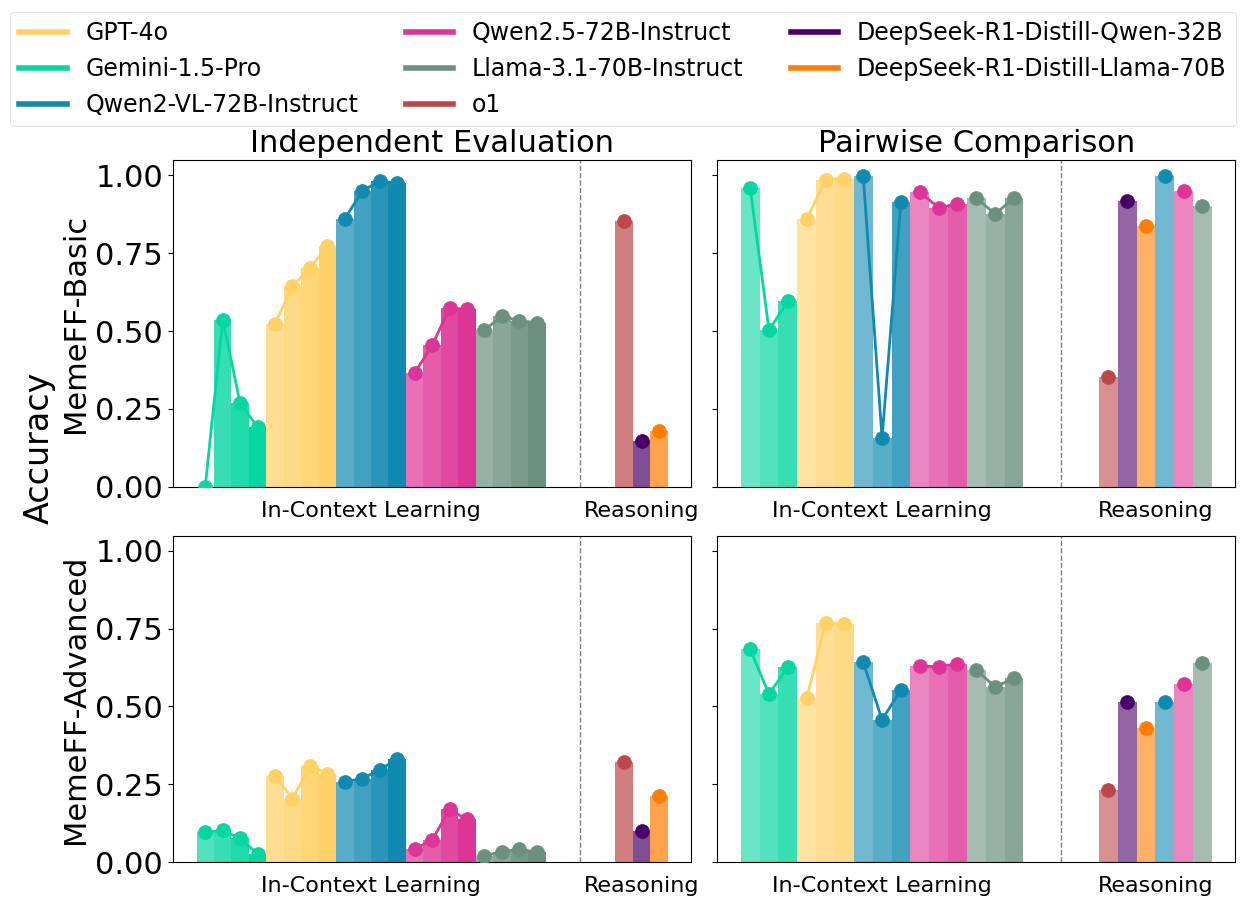

In [7]:
fig, axs = plt.subplots(2, 2, sharey=True)
plt.rc('xtick', labelsize=22)
plt.rc('ytick', labelsize=22)
mpl.rcParams['patch.linewidth']=0.5 #width of the boundary of legend
fig.subplots_adjust(left=0.14, bottom=0.04, right=0.99, top=0.82, wspace=0.05, hspace=0.15) #margin of the figure
fig.set_size_inches(12.5, 9) #exact size of the figure

datasets = {
    "ours_v4": "MemeFF-Basic",
    "relca_v2": "MemeFF-Advanced",
}
eval_modes = {
    "independent": "Independent Evaluation",
    "pairwise": "Pairwise Comparison",
}
cluster_label = {
    "ICL": {
        "label": "In-Context Learning",
        "font_size": 16,
    },
    "Reasoning": {
        "label": "Reasoning",
        "font_size": 16,
    },
}
cluster_margin = 0.5
bar_width = 0.1

for i, dataset in enumerate(datasets):
    axs[i, 0].set_ylabel(datasets[dataset], fontsize=22)
    for j, eval_mode in enumerate(eval_modes):
        configs = independent_results if eval_mode == "independent" else pairwise_results

        ax = axs[i, j]
        if i == 0: ax.set_title(eval_modes[eval_mode], fontsize=22)
        bar_x = 0

        lines_x, lines_y = {}, {}
        for k, cluster in enumerate(configs.keys()):
            cluster_xs, last_model = [], None
            for l, config in enumerate(configs[cluster]):
                if l == 0 and k > 0: 
                    bar_x += cluster_margin
                else:
                    bar_x += bar_width
                search_config = {**config, "dataset_name": dataset}
                del search_config["label"]
                row = get_row(**search_config)
                accuracy = row["accuracy"]
                
                if len(accuracy):
                    accuracy = accuracy.iloc[0]
                else: 
                    accuracy = 0
                    print(config, dataset)

                if cluster == "ICL":
                    if config["model_name"] not in lines_x:
                        lines_x[config["model_name"]] = []
                        lines_y[config["model_name"]] = []
                    lines_x[config["model_name"]].append(bar_x)
                    lines_y[config["model_name"]].append(accuracy)

                ax.bar(
                    bar_x, accuracy, 
                    bar_width, 
                    color=model_properties[config["model_name"]]["color"],
                    alpha=0.6 + config["n_demos"] * 0.05,
                )
                
                ax.scatter(
                    [bar_x], [accuracy], 
                    color=model_properties[config["model_name"]]["color"],
                    zorder=3,
                    s=100,
                )
                    

                cluster_xs.append(bar_x)
            cluster_center = sum(cluster_xs) / len(cluster_xs)
            ax.annotate(
                cluster_label[cluster]["label"], 
                xy=(cluster_center, 0), 
                xytext=(0, -10),
                textcoords='offset points', 
                ha='center', 
                va='top', 
                fontsize=cluster_label[cluster]["font_size"], 
                color='black'
            )
            
            # Add a line between different clusters
            if k < len(configs.keys()) - 1:
                ax.axvline(x=bar_x + cluster_margin / 2, color='grey', linestyle='--', linewidth=1)
        
        for model_name in lines_x:
            ax.plot(lines_x[model_name], lines_y[model_name], color=model_properties[model_name]["color"], lw=2)
        ax.set_xticklabels([])
        ax.set_xticks([])
handles = []
labels = []
fig.supylabel('Accuracy', fontsize=24)

for model_name, properties in model_properties.items():
    handles.append(plt.Line2D([0], [0], color=properties["color"], lw=4))
    labels.append(model_properties[model_name]["label"])
fig.legend(handles, labels, ncol=3, loc='upper center', fontsize=17)

plt.savefig(f"{root_dir}/figures/prompting_plots.pdf")